# Individual Assignment 1
## CSE 40467 / 60467

**Instructions:**
*   You must complete the empty cells and run the code.
*   Gradescope will check your code and output responses.
*   It's an individual assignment, so please do not share your responses with other classmates. Gradescope will evaluate similarity of responses.
* If you have any questions. Please post them on Canvas or reach out to the TAs.




In [2]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import string
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
pd.options.mode.chained_assignment = None

## The Dataset


We will the ["Jobs NYC Posting"](https://catalog.data.gov/dataset/nyc-jobs) dataset. This dataset contains current job postings available on the City of New York’s official jobs site (http://www.nyc.gov/html/careers/html/search/search.shtml).

Load the database. Assign the dataframe as `jobs`

In [9]:
jobs = pd.read_csv("Jobs_NYC_Postings.csv")

Print the dataframe `jobs`

In [12]:
print(jobs)

      Job ID                          Agency Posting Type  # Of Positions  \
0     586343  DEPT OF ENVIRONMENT PROTECTION     External               1   
1     554086  DEPT OF ENVIRONMENT PROTECTION     Internal               2   
2     609320     HRA/DEPT OF SOCIAL SERVICES     External               2   
3     614040           NYC HOUSING AUTHORITY     External               1   
4     622153          CAMPAIGN FINANCE BOARD     External               1   
...      ...                             ...          ...             ...   
5598  622357                 FIRE DEPARTMENT     Internal               1   
5599  577755     DEPT OF CITYWIDE ADMIN SVCS     Internal               1   
5600  601434     HRA/DEPT OF SOCIAL SERVICES     Internal              24   
5601  622622  DEPT OF ENVIRONMENT PROTECTION     Internal               1   
5602  597548   DEPT OF DESIGN & CONSTRUCTION     External               2   

                                         Business Title  \
0               

How many observations does the database have?

In [14]:
num_observations = jobs.shape[0]
print(f"number of observations: {num_observations}")

number of observations: 5603


Check how many values in each column are unique. Check out the following [command](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html).

In [24]:
unique_values_per_column = jobs.nunique(axis=0)
print(unique_values_per_column)

Job ID                           2870
Agency                             58
Posting Type                        2
# Of Positions                     35
Business Title                   1983
Civil Service Title               396
Title Classification                6
Title Code No                     418
Level                              20
Job Category                      186
Full-Time/Part-Time indicator       2
Career Level                        5
Salary Range From                 578
Salary Range To                   804
Salary Frequency                    3
Work Location                     302
Division/Work Unit                873
Job Description                  2758
Minimum Qual Requirements         472
Preferred Skills                 1825
Additional Information            834
To Apply                         1462
Hours/Shift                       365
Work Location 1                   293
Recruitment Contact                 0
Residency Requirement              80
Posting Date

The dataframe has many duplicates. There is one particular column that will help you identify which observations are duplicated. Sort the values according to that column

In [36]:
jobs_sorted = jobs.sort_values(by='Job ID')

Print the dataframe and check how the data. What do you see?

In [37]:
print(jobs_sorted.head(10))

      Job ID                       Agency Posting Type  # Of Positions  \
1720  469953  HRA/DEPT OF SOCIAL SERVICES     Internal               1   
2104  469953  HRA/DEPT OF SOCIAL SERVICES     External               1   
4694  470441        NYC HOUSING AUTHORITY     Internal               1   
763   470441        NYC HOUSING AUTHORITY     External               1   
5030  472791        NYC HOUSING AUTHORITY     Internal               1   
5224  472791        NYC HOUSING AUTHORITY     External               1   
4100  473825        NYC HOUSING AUTHORITY     Internal               1   
3378  473825        NYC HOUSING AUTHORITY     External               1   
1869  479039     DEPARTMENT OF CORRECTION     Internal               1   
3483  481622    ADMIN FOR CHILDREN'S SVCS     External               1   

                         Business Title             Civil Service Title  \
1720                   CONTRACT ANALYST                   STAFF ANALYST   
2104                   CONTRACT ANA

According to the printed sorted information, there does exist data duplications in this particular dataframe. Specifically, this dataset contains duplicate 'Job ID' entries, aside from the 'Posting Type', other information keeps all equivalent, indicating that the same position might be posted multiple times as both Internal and External types, which requires a decision on how to handle these duplicates based on the analysis objective.

Remove the duplicates based on this column.

In [38]:
# sort the dataframe by posting type and job id
# make sure that the External jobs takes precedence over the Internal ones when they share the same id
jobs_sorted = jobs.sort_values(by=['Posting Type', 'Job ID'], ascending=[False, True])

In [39]:
# drop the internally posted job
jobs_unique = jobs_sorted.drop_duplicates(subset='Job ID', keep='first')

Calculate the updated number of observations.

In [42]:
print(f"number of observations: {jobs_unique.shape[0]}")

number of observations: 2870


Why did we have too many duplicates? Write your answer below.

### MANUAL RESPONSE
The dataset has duplicates primarily because the same positions are posted for both internal employees (marked as Internal) and external applicants (marked as External), therefore in each job appears twice in the dataset with different posting types.

Calculate the number of unique values per column.

In [45]:
unique_values_per_column = jobs_unique.nunique(axis=0)
print(unique_values_per_column)

Job ID                           2870
Agency                             58
Posting Type                        2
# Of Positions                     35
Business Title                   1983
Civil Service Title               396
Title Classification                6
Title Code No                     418
Level                              20
Job Category                      186
Full-Time/Part-Time indicator       2
Career Level                        5
Salary Range From                 578
Salary Range To                   804
Salary Frequency                    3
Work Location                     302
Division/Work Unit                873
Job Description                  2758
Minimum Qual Requirements         472
Preferred Skills                 1825
Additional Information            834
To Apply                         1462
Hours/Shift                       365
Work Location 1                   293
Recruitment Contact                 0
Residency Requirement              80
Posting Date

Check the number of missing

In [49]:
number_of_missing = jobs_unique.isnull().sum()
print(f"the number of missing: \n{number_of_missing}")

the number of missing: 
Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator      67
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          19
Preferred Skills                  628
Additional Information           1074
To Apply                          221
Hours/Shift                      1821
Work Location 1                  1813
Recruitment Contact              2870
Residency Requirement     

Remove all the features that have more than 50% missing values

In [59]:
# calculate missing ratio for each column
missing_ratio = jobs_unique.isnull().mean()
# find out the columns that need to be dropped
index_drop = missing_ratio[missing_ratio > 0.5].index
# drop those columns and get a clean datafram
jobs_clean = jobs_unique.drop(columns=index_drop)

Check that the columns were deleted. Print the columns of the dataframe as a list.

In [66]:
print(f"the original columns: {list(jobs.columns)}\n")
print(f"the columns after dropping: {list(jobs_clean.columns)}\n")
print(f"the dropped columns: {list(set(jobs.columns) - set(jobs_clean.columns))}")

the original columns: ['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title', 'Civil Service Title', 'Title Classification', 'Title Code No', 'Level', 'Job Category', 'Full-Time/Part-Time indicator', 'Career Level', 'Salary Range From', 'Salary Range To', 'Salary Frequency', 'Work Location', 'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements', 'Preferred Skills', 'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1', 'Recruitment Contact', 'Residency Requirement', 'Posting Date', 'Post Until', 'Posting Updated', 'Process Date']

the columns after dropping: ['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title', 'Civil Service Title', 'Title Classification', 'Title Code No', 'Level', 'Job Category', 'Full-Time/Part-Time indicator', 'Career Level', 'Salary Range From', 'Salary Range To', 'Salary Frequency', 'Work Location', 'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements', 'Preferred Skills', 'Additio

## Checking the data

Check the types of columns

In [67]:
print(jobs_clean.dtypes)

Job ID                             int64
Agency                            object
Posting Type                      object
# Of Positions                     int64
Business Title                    object
Civil Service Title               object
Title Classification              object
Title Code No                     object
Level                             object
Job Category                      object
Full-Time/Part-Time indicator     object
Career Level                      object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Division/Work Unit                object
Job Description                   object
Minimum Qual Requirements         object
Preferred Skills                  object
Additional Information            object
To Apply                          object
Residency Requirement             object
Posting Date                      object
Posting Updated 

Identify the categorical columns and assign them as the `categorical_columns` list

In [70]:
categorical_columns = [col for col in jobs_clean.columns if jobs_clean[col].dtype == 'object']

Print the columns

In [77]:
print(f"categorical columns: {categorical_columns}")

categorical columns: ['Agency', 'Posting Type', 'Business Title', 'Civil Service Title', 'Title Classification', 'Title Code No', 'Level', 'Job Category', 'Full-Time/Part-Time indicator', 'Career Level', 'Salary Frequency', 'Work Location', 'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements', 'Preferred Skills', 'Additional Information', 'To Apply', 'Residency Requirement', 'Posting Date', 'Posting Updated', 'Process Date']


Assign all the NA values for the categorical columns as `` (i.e., empty string)

In [78]:
for col in categorical_columns:
    jobs_clean[col].fillna('', inplace=True)

Identify the numeric columns and assign them as the `numeric_columns` list

In [79]:
numeric_columns = [col for col in jobs_clean.columns if jobs_clean[col].dtype in ['int64', 'float64']]

Print the variable

In [80]:
print(f"numeric columns: {numeric_columns}")

numeric columns: ['Job ID', '# Of Positions', 'Salary Range From', 'Salary Range To']


One variable should not be here since it's only used as an identifier. Remove it.

In [81]:
numeric_columns.remove('Job ID')
print("Updated numeric columns:", numeric_columns)

Updated numeric columns: ['# Of Positions', 'Salary Range From', 'Salary Range To']


Calculate the dataframe's metrics using `describe()`

In [83]:
jobs_metrics = jobs_clean.describe()
print(jobs_metrics)

              Job ID  # Of Positions  Salary Range From  Salary Range To
count    2870.000000     2870.000000         2870.00000      2870.000000
mean   595741.888850        1.947038        64070.07425     89092.585575
std     27309.650581        4.878301        30827.92788     46160.342628
min    469953.000000        1.000000            0.00000        15.450000
25%    585372.250000        1.000000        51535.00000     64608.000000
50%    604548.500000        1.000000        62370.00000     85147.000000
75%    616881.250000        1.000000        80440.00000    113240.000000
max    625159.000000       98.000000       225000.00000    252165.000000


Which jobs have a "salary range from" equal to zero? Filter those jobs and print the `Job ID`, `Civil Service Title`, and `Salary Range To`

In [85]:
jobs_range_from_zero = jobs_clean[jobs_clean['Salary Range From'] == 0]
print(jobs_range_from_zero[['Job ID', 'Civil Service Title', 'Salary Range To']])

      Job ID             Civil Service Title  Salary Range To
3454  484977             SENIOR IT ARCHITECT         100000.0
4550  542360  ASSISTANT DISTRICT ATTORNEY (S         180000.0
5451  545108           IT PROJECT SPECIALIST          75000.0
4611  548554      IT INFRASTRUCTURE ENGINEER         140000.0
4722  549839          IT SECURITY SPECIALIST         150000.0
1360  550030  IT SERVICE MANAGEMENT SPECIALI          75000.0
1365  558012           IT PROJECT SPECIALIST          75000.0
533   565279      IT INFRASTRUCTURE ENGINEER         140000.0
3020  573786      IT INFRASTRUCTURE ENGINEER         140000.0
824   588716  IT SERVICE MANAGEMENT SPECIALI         130000.0
3742  618688  SUPERVISOR OF RADIO REPAIR OPE         133782.0


Calculate the 25% percentile of `Salary Range To` and assign it to `jobs_range_to_q25`

In [86]:
jobs_range_to_q25 = jobs_clean['Salary Range To'].quantile(0.25)

Print the variable

In [87]:
print("25% percentile of Salary Range To:", jobs_range_to_q25)

25% percentile of Salary Range To: 64608.0


Calculate the 75% percentile of `Salary Range To` and assign it to `jobs_range_to_q75`

In [96]:
# calculate the q75 number for Salary Range To
jobs_range_to_q75 = jobs_clean['Salary Range To'].quantile(0.75)

Print the variable

In [97]:
print(f"{jobs_range_to_q75}")

113240.0


Using `Salary Range To`, identify how many job postings this database has for each `Civil Service Title` higher than the 75% percentile.

In [103]:
# find jobs in which Salary Range To is higher than q75
jobs_salary_higher_than_q75 = jobs_clean[jobs_clean['Salary Range To'] > jobs_range_to_q75]
# count the number of job postings by Civil Service Title
job_postings_by_title_lower_than_q75 = jobs_salary_higher_than_q75['Civil Service Title'].value_counts()
print(job_postings_by_title_lower_than_q75)

Civil Service Title
ADMINISTRATIVE STAFF ANALYST (    55
ADMINISTRATIVE PROJECT MANAGER    44
ADMINISTRATIVE ENGINEER           35
EXECUTIVE AGENCY COUNSEL          31
COMPUTER SPECIALIST (SOFTWARE)    27
                                  ..
CHIEF OF STAFF TO FIRST DEPUTY     1
DIRECTOR OF PUBLIC RELATIONS (     1
ADMINISTRATIVE QUALITY ASSURAN     1
DIR OF HEALTHCARE FACILITIES A     1
Assistant Commissioner of Info     1
Name: count, Length: 146, dtype: int64


Calculate the histogram of the numeric variables. Do not forget to filter using the variable `numeric_columns`

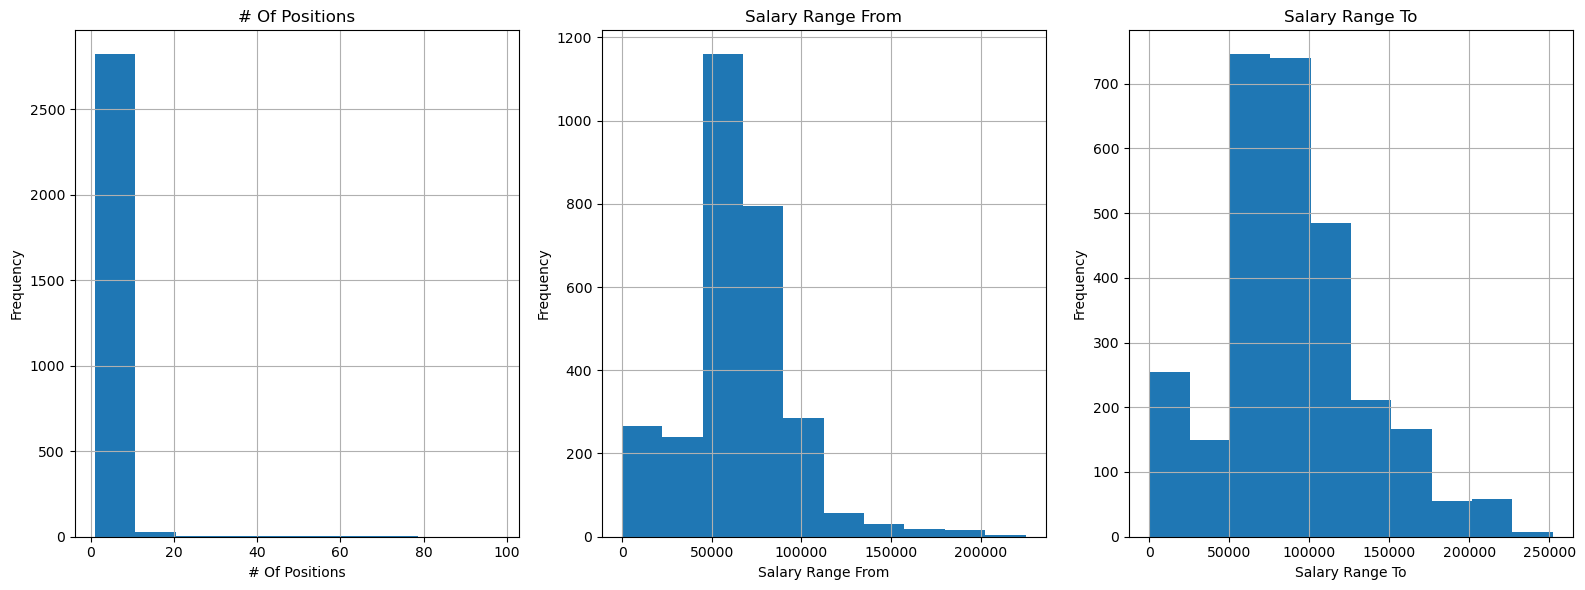

In [109]:
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(16, 6))

for i, column in enumerate(numeric_columns):
    jobs_clean[column].hist(ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Identify three outliers according to `# Of Positions`

In [123]:
positions_outliers = jobs_clean[jobs_clean['# Of Positions'] > 20]
sorted_positions_outliers = positions_outliers.sort_values(by='# Of Positions')
print(f"{sorted_positions_outliers.tail(3)}")

      Job ID                         Agency Posting Type  # Of Positions  \
1156  570954  DEPT OF HEALTH/MENTAL HYGIENE     Internal              75   
706   570680  DEPT OF HEALTH/MENTAL HYGIENE     Internal              81   
3423  590654    HRA/DEPT OF SOCIAL SERVICES     Internal              98   

                                         Business Title  \
1156  Public Health Nurse I (Part-Time), Bureau of S...   
706   Junior Public Health Nurse (Part-Time), Bureau...   
3423                                        CASE WORKER   

                 Civil Service Title Title Classification Title Code No Level  \
1156  PUBLIC HEALTH NURSE (SCHOOL HE        Competitive-1         51022    01   
706   JR PHNURSE (SCH HLTH)>20 HR PT    Non-Competitive-5         5100B    00   
3423                      CASEWORKER        Competitive-1         52304    00   

                                          Job Category  ...  \
1156  Constituent Services & Community Programs Health  ...   
706   C

How many jobs are Full-Time or Part-Time?

In [148]:
jobs_full_time = jobs_clean[jobs_clean['Full-Time/Part-Time indicator'] == 'F']
jobs_part_time = jobs_clean[jobs_clean['Full-Time/Part-Time indicator'] == 'P']
print(f"number of jobs that are Full-Time or Part-Time: {len(jobs_full_time) + len(jobs_part_time)}")

number of jobs that are Full-Time or Part-Time: 2803


Check the frequency of full-time jobs according to `Civil Service Title`

In [154]:
full_time_jobs_by_title = jobs_full_time.groupby('Civil Service Title').size()
print(f"number of full-time jobs by title: \n{full_time_jobs_by_title}")

number of full-time jobs by title: 
Civil Service Title
ACCOUNTANT                        12
ADM CITY PLANNER (NON MGRL)        6
ADM CONSTRUCTION PRJ MGR-NM        9
ADM ENGINEER (NON MGRL)           19
ADM HOUSING DEV SPEC(NON MGRL)     1
                                  ..
URBAN PARK RANGER                  1
VICE PRESIDENT (NYC PUBLIC HOU     2
WATERSHED MAINTAINER               5
WORKER'S COMPENSATION BENEFITS     1
YOUTH DEVELOPMENT SPECIALIST       1
Length: 382, dtype: int64


Check the frequency of part-time jobs according to `Civil Service Title`.

In [155]:
part_time_jobs_by_title = jobs_part_time.groupby('Civil Service Title').size()
print(f"number of full-time jobs by title: \n{part_time_jobs_by_title}")

number of full-time jobs by title: 
Civil Service Title
ANALYST CFB AL 2&3 ONLY            1
ASSISTANT CORPORATION COUNSEL      1
ASSOCIATE CHEMIST                  1
ASSOCIATE STAFF ANALYST            1
CITY CUSTODIAL ASSISTANT           1
CITY MEDICAL SPECIALIST            1
CITY MEDICAL SPECIALIST (PART-     8
CITY VETERINARIAN (PART-TIME)      1
CLERICAL ASSOCIATE                 5
COLLEGE AIDE (ALL CITY DEPTS)     20
COLLEGE AIDE - ASSIGNMENT LEVE     2
COMMUNITY ASSISTANT                2
COMMUNITY ASSOCIATE                4
COMMUNITY COORDINATOR              2
COMPUTER ASSOC (TECH SUPP)         1
CONSULTANT PUBLIC HEALTH NURSE     3
CYBER SECURITY ANALYST             1
City Mortuary Technician           1
ELECTRICIAN                        1
EMERGENCY PREPAREDNESS MANAGER     1
EMPLOYEE ASSISTANCE PROGRAM SP     1
EXECUTIVE AGENCY COUNSEL           1
HEARING OFFICER (PVB - NOT EMP     1
IT AUTOMATION AND MONITORING E     1
IT SERVICE MANAGEMENT SPECIALI     1
JR PHNURSE (SCH HLT

What is the most frequent Division/Work unit?

In [161]:
division_work_unit_freq = jobs_clean['Division/Work Unit'].value_counts()
most_frequent_division = division_work_unit_freq.idxmax()
print(f"the most popular Division/Work Unit is: {most_frequent_division}")

the most popular Division/Work Unit is: FIA Operations-NM


What are the top-10 job categories?

In [166]:
job_categories_freq = jobs_clean['Job Category'].value_counts()
job_categories_top10 = job_categories_freq.head(10)
print(f"the top-10 job categories are: \n{job_categories_top10}")

the top-10 job categories are: 
Job Category
Engineering, Architecture, & Planning                                           396
Technology, Data & Innovation                                                   214
Finance, Accounting, & Procurement                                              186
Social Services                                                                 185
Legal Affairs                                                                   146
Building Operations & Maintenance                                               140
Constituent Services & Community Programs Health Policy, Research & Analysis    127
Public Safety, Inspections, & Enforcement                                       124
Health                                                                          123
Administration & Human Resources                                                117
Name: count, dtype: int64


Save the top-10 job categories as a list using the variable `most_solicited_jobs`

In [167]:
most_solicited_jobs = job_categories_top10.index.tolist()

Print the list

In [168]:
print(f"the the top-10 job categories are: \n{most_solicited_jobs}")

the the top-10 job categories are: 
['Engineering, Architecture, & Planning', 'Technology, Data & Innovation', 'Finance, Accounting, & Procurement', 'Social Services', 'Legal Affairs', 'Building Operations & Maintenance', 'Constituent Services & Community Programs Health Policy, Research & Analysis', 'Public Safety, Inspections, & Enforcement', 'Health', 'Administration & Human Resources']


## Pre-processing

Many jobs have residency requirements. Print the frequency using `value_counts()`

In [171]:
residency_requirement_freq = jobs_clean['Residency Requirement'].value_counts()
print(residency_requirement_freq)

Residency Requirement
New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.                                                                         1582
New York City Residency is not required for this position                                                                                                                                                                                                                                                                                                                                                                                                                                 715
NYCHA has no residency

We will create a new column called `Residency Required`. This column will be 1 if the substring "is generally required" is in the description. Else, it will be 0.

In [173]:
residency_required_int = jobs_clean['Residency Requirement'].str.contains('is generally required').astype(int)
jobs_clean['Residency Required'] = residency_required_int

Print the number of jobs that we identified with a residency requirement using `value_counts()`.

In [174]:
residency_required_count = jobs_clean['Residency Required'].value_counts()
print(f"{residency_required_count}")

Residency Required
1    1602
0    1268
Name: count, dtype: int64


Check the most frequent number of minimal qualification requirements using `value_counts`

In [179]:
min_qual_requirements_freq = jobs_clean['Minimum Qual Requirements'].value_counts()
print(min_qual_requirements_freq)

Minimum Qual Requirements
1. A baccalaureate degree from an accredited college and two years of experience in community work or community centered activities in an area related to the duties described above; or  2. High school graduation or equivalent and six years of experience in community work or community centered activities in an area related to the duties as described above; or  3. Education and/or experience which is equivalent to 1 or 2 above. However, all candidates must have at least one year of experience as described in 1 above.                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Many jobs are described based on degrees. Create a new variable called `required_education_bs`. This variable will be 1 if the word `baccalaureate` is present in the description. Otherwise, it will be zero.

In [180]:
jobs_clean['required_education_bs'] = jobs_clean['Job Description'].str.contains('baccalaureate', case=False).astype(int)

What is the percentage of jobs that require a baccalaureate degree?

In [183]:
num_jobs_require_bs = jobs_clean['required_education_bs'].sum()
percentage_require_bs = (num_jobs_require_bs / len(jobs_clean))
print(percentage_require_bs)

0.012543554006968641


Following the same logic, create the column `required_education_ms` to flag if the description has the word `master's`.

In [184]:
jobs_clean['required_education_ms'] = jobs_clean['Job Description'].str.contains('master\'s', case=False).astype(int)

What is the percentage of jobs that require a master's degree?

In [186]:
num_jobs_require_ms = jobs_clean['required_education_ms'].sum()
percentage_require_ms = (num_jobs_require_ms / len(jobs_clean))
print(percentage_require_ms)

0.0017421602787456446


Following the same logic, create the column `required_education_phd` to flag if the description has the word `doctorate`.

In [187]:
jobs_clean['required_education_phd'] = jobs_clean['Job Description'].str.contains('doctorate', case=False).astype(int)

What is the percentage of jobs that require a doctoral degree?

In [188]:
num_jobs_require_phd = jobs_clean['required_education_phd'].sum()
percentage_require_phd = (num_jobs_require_phd / len(jobs_clean))
print(percentage_require_phd)

0.0003484320557491289


## Text Analysis

In [189]:
stop_words = list(text.ENGLISH_STOP_WORDS)

Define the variable `most_common_100_words` which has the 100 most frequent words from the column "Minimum Qual Requirements".

In [198]:
text_data = ' '.join(jobs_clean['Minimum Qual Requirements']).lower()

filtered_words = []
for word in text_data.split():
    if word in stop_words:
        filtered_words.append(word)

words_counter = Counter(filtered_words)
most_common_100_words = [word for word, _ in words_counter.most_common(100)]

Print the variable `most_common_100_words`

In [199]:
print(most_common_100_words)

['or', 'of', 'in', 'a', 'the', 'and', 'to', 'an', 'for', 'as', 'one', 'must', 'from', 'be', 'have', 'at', 'least', 'by', 'two', 'which', 'with', 'may', 'its', 'is', 'all', 'four', 'been', 'three', 'on', 'above', 'six', 'this', 'more', 'up', 'five', 'i', 'not', 'each', 'will', 'you', 'than', 'any', 'that', 'are', 'such', 'either', 'can', 'other', 'your', 'after', 'it', 'within', 'full', 'last', 'upon', 'they', 'no', 'eight', 'if', 'under', 'twelve', 'those', 'their', 'nine', 'only', 'towards', 'per', 'during', 'another', 'there', 'sixty', 'these', 'has', 'ten', 'had', 'who', 'less', 'through', 'first', 'whether', 'but', 'detail', 'how', 'very', 'out', 'where', 'made', 'also', 'take', 'him', 'her', 'was', 'fire', 'whose', 'do', 'toward', 'beyond', 'fifteen', 'both', 'however']


Load the following function. It will use the TF-IDF algorithm to detect the most relevant words given a set of documents.

In [200]:
def get_tfidf_top_features(documents,n_top=100):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(documents)
    importance = np.argsort(np.asarray(tfidf.sum(axis=0)).ravel())[::-1]
    tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
    return list(tfidf_feature_names[importance[:n_top]])

Create the variable `most_tfidf_100_words` and identify the most relevant 100 words of the column "Minimum Qual Requirements" using the previous function.

In [203]:
most_tfidf_100_words = get_tfidf_top_features(jobs_clean['Minimum Qual Requirements'])

Print the words that are included in `most_important_100_words` and not in `most_common_100_words`.

In [208]:
special_words = []
for word in most_tfidf_100_words:   # most_important_100_words ?
    if word not in most_common_100_words:
        special_words.append(word)

Now, print the word which words are included in `most_common_100_words` and not in `most_important_100_words`.

In [209]:
print(special_words)

['experience', 'years', 'college', 'year', 'engineering', 'accredited', 'described', 'degree', 'community', 'equivalent', 'satisfactory', 'administrative', 'education', 'time', 'school', 'related', 'work', 'baccalaureate', 'administration', 'high', 'requirements', 'assignment', 'professional', 'area', 'supervisory', 'level', 'university', 'months', 'state', 'duties', 'candidates', 'credits', 'qualification', 'activities', 'public', 'centered', 'research', 'project', 'managerial', 'civil', 'field', 'management', 'new', 'york', 'license', 'capacity', 'science', 'planning', 'diploma', 'executive', 'semester', 'educational', 'clerical', 'health', 'specialization', 'appropriate', 'technology', 'program', 'architecture', 'environmental', 'responsible', 'graduation', 'construction', 'including', 'substituted', 'master', 'required', 'computer', 'bar', 'physical', 'valid', 'biological', 'recognized', 'accrediting', 'employment', 'social', 'additional', 'graduate', '18', 'ii', 'position', 'lands

Based on the unique words that each list has, which variable has the most meaningful words? Write down the name of the variable below

# Manual response
unique_tfidf_words or most_important_100_words

Run the `get_tfidf_top_features` function to find the most important words for `Job Description`

In [211]:
job_description_tfidf_top_features = get_tfidf_top_features(jobs_clean['Job Description'])
print(job_description_tfidf_top_features)

['health', 'city', 'new', 'public', 'services', 'work', 'project', 'water', 'york', 'department', 'construction', 'design', 'nyc', 'management', 'program', 'projects', 'dep', 'systems', 'wastewater', 'office', 'staff', 'including', 'support', 'data', 'service', 'programs', 'mental', 'bureau', 'agency', 'candidate', 'responsible', 'community', 'position', 'ensure', 'planning', 'development', 'provide', 'information', 'review', 'unit', 'related', 'assist', 'team', 'reports', 'environmental', 'housing', 'division', 'employees', 'capital', 'facilities', 'required', 'selected', 'safety', 'job', 'operations', 'quality', 'director', 'procurement', 'civil', 'agencies', '000', 'yorkers', 'administrative', 'access', 'case', 'contract', 'title', 'engineering', 'assistance', 'include', 'building', 'requirements', 'manager', 'perform', 'budget', 'compliance', 'apply', 'permanent', 'nycha', 'business', 'policy', 'employment', 'treatment', 'legal', 'duties', 'application', 'process', 'child', 'mainte

## Visualization

Create a `boxplot` using seaborn using the "Salary Range To" data. Classify the observataions based on the most frequent Job Categories.

To make the x labels readable, use the command `plt.xticks(rotation=90)`

Hint: Use the variable `most_solicited_jobs` to filter.

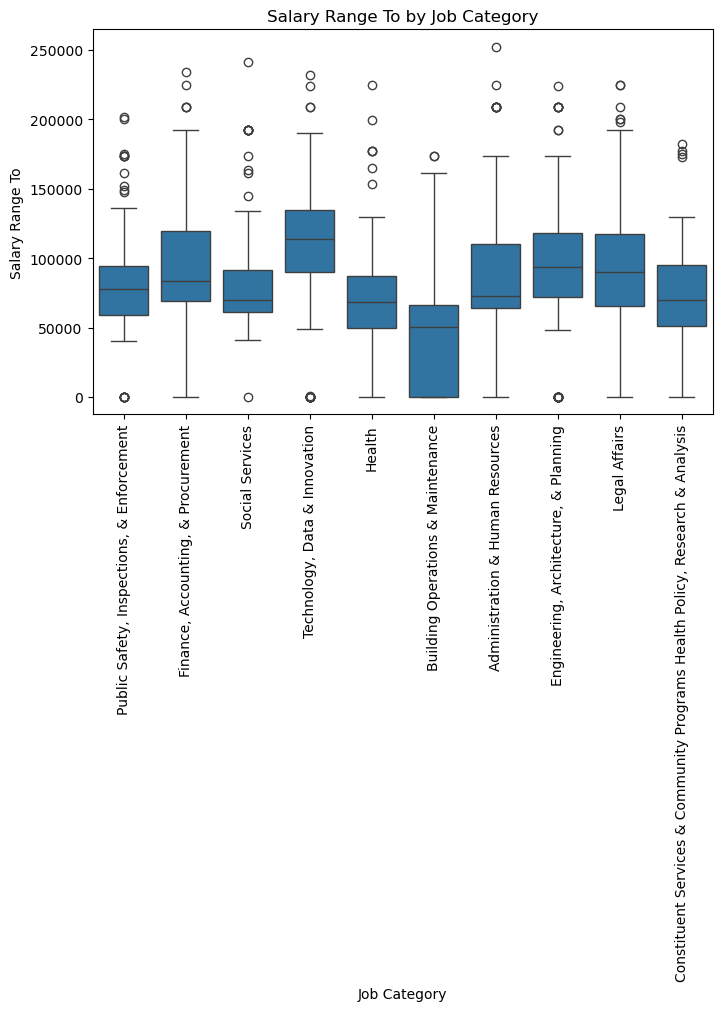

In [222]:
filtered_jobs = most_solicited_jobs
filtered_jobs = jobs_clean[jobs_clean['Job Category'].isin(most_solicited_jobs)]

plt.figure(figsize=(8, 5))
sns.boxplot(x='Job Category', y='Salary Range To', data=filtered_jobs)
plt.xticks(rotation=90)
plt.title('Salary Range To by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Salary Range To')
plt.show()

We will plot the number of jobs based on the `Agency`
First, we need to compute the number of jobs in each agency.
Create a new dataframe `agency_frequency` that has two columns: the agency and the number of posted jobs in that agency.

In [227]:
agency_frequency = jobs_clean['Agency'].value_counts().reset_index()
agency_frequency.columns = ['Agency', 'Number of Jobs']

Print the `agency_frequency` dataframe

In [228]:
print(agency_frequency)

                            Agency  Number of Jobs
0   DEPT OF ENVIRONMENT PROTECTION             532
1    DEPT OF HEALTH/MENTAL HYGIENE             445
2      HRA/DEPT OF SOCIAL SERVICES             344
3     DEPARTMENT OF TRANSPORTATION             257
4    DEPT OF DESIGN & CONSTRUCTION             219
5            NYC HOUSING AUTHORITY             167
6        OFFICE OF THE COMPTROLLER              99
7          BRONX DISTRICT ATTORNEY              86
8         DEPARTMENT OF CORRECTION              62
9       FINANCIAL INFO SVCS AGENCY              60
10       ADMIN FOR CHILDREN'S SVCS              53
11      DEPT. OF HOMELESS SERVICES              47
12                 FIRE DEPARTMENT              47
13  HOUSING PRESERVATION & DVLPMNT              36
14     DEPT OF CITYWIDE ADMIN SVCS              34
15      DEPT OF PARKS & RECREATION              27
16   OFFICE OF MANAGEMENT & BUDGET              26
17     DISTRICT ATTORNEY-MANHATTAN              26
18   DEPT OF YOUTH & COMM DEV S

Now, create a pie chart using this [documentation page](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html).

Check also the `autopct` parameter to print the percentages automatically.

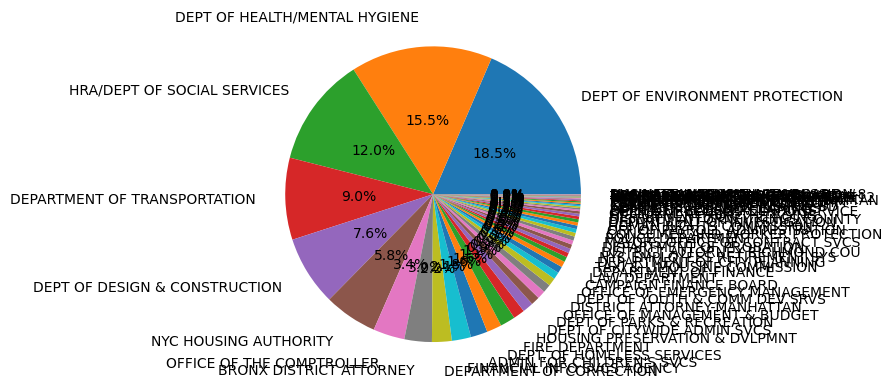

In [247]:
labels = agency_frequency['Agency']
sizes = agency_frequency['Number of Jobs']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=.5, labeldistance=1.2, radius=1)

plt.show()

Using the seaborn library, plot a heatmap with the correlations of `jobs`. You can use directly `jobs.corr()`.

Check the documentation [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

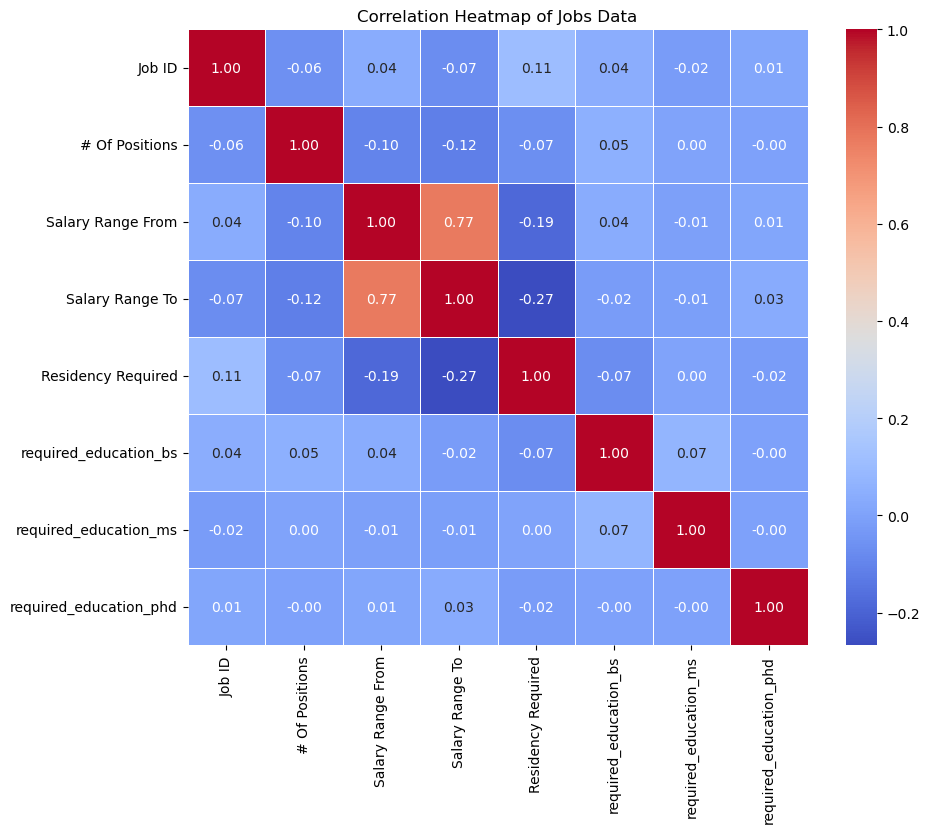

In [258]:
non_object_columns = jobs_clean.select_dtypes(exclude='object').columns

correlation_matrix = jobs_clean[non_object_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Jobs Data')
plt.show()